In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
from nltk.corpus import stopwords 
import pandas as pd
import tweepy
import nltk
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
nltk.download('punkt')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding,SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping,ModelCheckpoint
import pickle
import keras
import re
import nltk
import string
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:

def searchTweets(filename,key_words, date_of_search, n_tweets):
        df = pd.DataFrame(columns=['username',
                                   'tweet'])
        key_words = str(key_words)
        query_terms = key_words.split('OR')
        tweets_list = []
        for query in query_terms:
          tweets = tweepy.Cursor(api.search,
                                query, lang="en",
                                since_id=date_of_search,
                                tweet_mode='extended').items(n_tweets)                    
          tweets_list += [tweet for tweet in tweets]
          j = 1
          for tweet in tweets_list:
                  u_name = tweet.user.screen_name
                  try:
                          tweet_text = tweet.retweeted_status.full_text
                  except AttributeError:
                          tweet_text = tweet.full_text
                  tweet_item = [u_name,tweet_text]
                  df.loc[len(df)] = tweet_item
                  j = j+1
        # filename = str(''.join(words)) + '.csv'
        # filename = 'final.csv'
        df.to_csv('/content/drive/MyDrive/IR_PROJECT/files/' + filename +'.csv')
 
        

In [ ]:
consumer_key = "VMMTKHay4flWCjGDF7DwWAinX"
consumer_secret =  "I5R1dkFZXh8f3Kztw9KljdXfh1YwbUQ8YRBgi8AFqKXfME5Jr8"
access_key = "1339636567497793542-GW2gQDvVy4pbmOBKLxoJgJiZhV17TU"
access_secret = "DrIavL0cqg83Symq9dy40tL8A46DFMCmdxu5PPt7ZMIEq"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# print("Input twitter hashtag")
# key_words = input()
# print("Input date in yyyy-mm--dd")
# dince_date = input()

# numtweet = 1000
# searchTweets('hate_keyword_based',key_words, dince_date, numtweet)


In [ ]:
# print("Input twitter hashtag")
# key_words = input()
# print("Input date in yyyy-mm--dd")
# dince_date = input()
# numtweet = 2000
# searchTweets('normal_keyword_based',key_words, dince_date, numtweet)


In [ ]:
temp_df = pd.read_csv('/content/drive/MyDrive/IR_PROJECT/files/hate_keyword_based.csv')
# temp_df = pd.read_csv('/content/drive/MyDrive/Copy of hate_keyword_based.csv')
temp_df.drop_duplicates(inplace=True)
temp_df

,Unnamed: 0,username,tweet
0,0,VeenoMacCreek,Stop thinkin everybody fuck with you like that...
1,1,MBA0795,@heywhitneygirl @private_4U @Rob_burnn how I'd...
2,2,koncededk,"i don’t hold grudges, i just don’t fuck with you."
3,3,Flipout,"Netflix actually WILL fuck you, bro. https://t..."
4,4,reynawap,"Stop UNNECESSARY COMMENTS UNDER ARTISTS POST, ..."
...,...,...,...
27995,27995,FEntrevias,#Palestine 🇵🇸✌️🔥 #فلسطين\nBrutal occupation st...
27996,27996,rodolfoxoliz,#Palestine 🇵🇸✌️🔥 #فلسطين\nBrutal occupation st...
27997,27997,axalotl,Cruel Thai trainer beat 🐘 over a dozen times w...
27998,27998,deadcoplollipop,#Palestine 🇵🇸✌️🔥 #فلسطين\nBrutal occupation st...


In [ ]:
temp_df = temp_df.drop(['Unnamed: 0', 'username'], axis = 1)
temp_df.insert(0,'label','')
temp_df['label'] = 1

In [ ]:
temp_df

,label,tweet
0,1,Stop thinkin everybody fuck with you like that...
1,1,@heywhitneygirl @private_4U @Rob_burnn how I'd...
2,1,"i don’t hold grudges, i just don’t fuck with you."
3,1,"Netflix actually WILL fuck you, bro. https://t..."
4,1,"Stop UNNECESSARY COMMENTS UNDER ARTISTS POST, ..."
...,...,...
27995,1,#Palestine 🇵🇸✌️🔥 #فلسطين\nBrutal occupation st...
27996,1,#Palestine 🇵🇸✌️🔥 #فلسطين\nBrutal occupation st...
27997,1,Cruel Thai trainer beat 🐘 over a dozen times w...
27998,1,#Palestine 🇵🇸✌️🔥 #فلسطين\nBrutal occupation st...


In [ ]:
# temp_df_normal = pd.read_csv('/content/drive/MyDrive/Copy of normal_keyword_based.csv')
temp_df_normal = pd.read_csv('/content/drive/MyDrive/IR_PROJECT/files/normal_keyword_based.csv')
temp_df_normal.drop_duplicates(inplace=True)
temp_df_normal

,Unnamed: 0,username,tweet
0,0,bestrappersuga,Proud to be one of the new artists in the Arti...
1,1,Malome_TT,@Perzsike_ Fitness ereng mongwaneng 👏🏿👏🏿👏🏿👏🏿
2,2,YKMoon8,Proud to be one of the new artists in the Arti...
3,3,RobWaters10,Ever wondered what a fitness paradise looks li...
4,4,AnissaNabi1,Thanks @FitBharat @FastandUp_India \nThis is f...
...,...,...,...
41995,41995,tweetmourad,"Cleaning up oceans, requires a ton of effort. ..."
41996,41996,learneasyguru,#Technology\nAmazon acquires India’s GlowRoad ...
41997,41997,IBelizeit,"Today, on #WorldEarthDay, I reiterated #Taiwan..."
41998,41998,GrumpyGran1948,We need a people’s party that evinces politica...


In [ ]:
temp_df_normal = temp_df_normal.drop(['Unnamed: 0', 'username'], axis = 1)
temp_df_normal.insert(0,'label','')
temp_df_normal['label'] = 0

In [ ]:
# temp_df = pd.read_csv('/content/drive/MyDrive/IR_PROJECT/HateFul_tweets.csv')

In [ ]:
import pandas as pd
# df = pd.read_csv("/content/drive/MyDrive/labeled_data.csv")
df = pd.read_csv("/content/drive/MyDrive/IR_PROJECT/dataset/labeled_data.csv")


In [ ]:
# df2 = pd.read_csv("/content/drive/MyDrive/train (2).csv")
df2 = pd.read_csv("/content/drive/MyDrive/IR_PROJECT/dataset/train (2).csv")


In [ ]:
df2

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
df2.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [ ]:
df.drop(['Unnamed: 0','count','hate_speech','offensive_language','neither'],axis=1,inplace=True)

In [ ]:
df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [ ]:
df2

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
label,31962.0,0.070146,0.255397,0.0,0.0,0.0,0.0,1.0


In [ ]:
df["class"].replace({0: 1, 2:0}, inplace=True)

In [ ]:
df.rename(columns ={'class':'label'}, inplace = True)

In [ ]:
df3 = pd.concat([df2,df])

In [ ]:
df3

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [ ]:
df3 = pd.concat([df3,temp_df])
df3 = df3.sample(frac=1,random_state=42).reset_index(drop=True)
df3

,label,tweet
0,0,#model i love u take with u all the time in ...
1,0,do what makes you ...be with who makes you #s...
2,1,@b_shiznitt fuck you bitch
3,1,RT @Miss_EmilyAnne: Good pussy&#128049;&#12816...
4,0,#babies dream on me verona lightweight strol...
...,...,...
84740,0,jst the past few weeks a close family frnd was...
84741,0,Wicked Oreo
84742,1,Cannot stress enough how much “mutually abusiv...
84743,1,black professor makes assumptions about an ent...


In [ ]:
df3 = pd.concat([df3,temp_df_normal])
df3 = df3.sample(frac=1,random_state=42).reset_index(drop=True)
df3

,label,tweet
0,0,Cleanliness in the surroundings makes us healt...
1,1,Snakes slithered in they coil RT @Faisal_nizam...
2,0,@user #wild #iris - #nature #photography qu...
3,1,RT @MisterrRager: &#8220;@ViriDoesItt: I alrea...
4,0,my last day of work before flying out to coast...
...,...,...
126740,0,@imloyalteee I can’t wait to be healthy so I c...
126741,0,"NBA's Golden State Warriors step into movies, ..."
126742,1,@isaabbellla haha you bitch &#128514; really t...
126743,0,@user we were born to be not to be #perfect...


In [ ]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
label,126745.0,0.401294,0.490162,0.0,0.0,0.0,1.0,1.0


In [ ]:
df3.rename(columns ={'tweet':'text_data'}, inplace = True)

In [ ]:
def lower_case(text):
    lower_case_text = text.lower()
    return lower_case_text

# def tokenizeReg(text):
#     tok=RegexpTokenizer('[A-Za-z0-9]?\w+')
#     return tok.tokenize(text)  

def stop_word(text):
  sentence = []
  stop_words = set(stopwords.words("english"))
  # for w in text:
  #       if w not in stop_words:
  #           sentence.append(w)
  #       else:
  #         continue
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  filtered_sentence = []
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  return " ".join(filtered_sentence)

def remove_punc(text):
  punc_tokenizer = nltk.RegexpTokenizer(r"\w+")
  text = punc_tokenizer.tokenize(text)
  return " ".join(text)


In [ ]:
updated_df = df3
updated_df.text_data = updated_df.text_data.str.replace('@[a-zA-Z0-9_]+', '')
updated_df.text_data = updated_df.text_data.str.replace('#[a-zA-Z0-9_]+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
updated_df

,label,text_data
0,0,Cleanliness in the surroundings makes us healt...
1,1,Snakes slithered in they coil RT : These hoes ...
2,0,- quality prints &amp; cards at:
3,1,RT : &;: I already know you trash if being tat...
4,0,my last day of work before flying out to coast...
...,...,...
126740,0,I can’t wait to be healthy so I can build a h...
126741,0,"NBA's Golden State Warriors step into movies, ..."
126742,1,haha you bitch &; really tho it will be good ...
126743,0,we were born to be not to be :) great da...


In [ ]:
updated_df.text_data = updated_df.text_data.str.replace('[^a-zA-Z]', ' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
stemmer = SnowballStemmer('english')
lemmer = WordNetLemmatizer()

In [ ]:
def lemmatization(text):
  lemmatizer = WordNetLemmatizer()
  text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
  return " ".join(text) 

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
updated_df.loc[:, 'text_data'] = updated_df['text_data'].apply(lambda x: lower_case(x))
updated_df.loc[:, 'text_data'] = updated_df['text_data'].apply(lambda x: remove_punc(x))
updated_df.loc[:, 'text_data'] = updated_df['text_data'].apply(lambda x: stop_word(x))
updated_df.loc[:, 'text_data'] = updated_df['text_data'].apply(lambda x: lemmatization(x))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
updated_df

,label,text_data
0,0,cleanliness surroundings make u healthy
1,1,snake slithered coil rt hoe loyal
2,0,quality print amp card
3,1,rt already know trash tatted list thing want n...
4,0,last day work flying coaster con xxxix tomorro...
...,...,...
126740,0,wait healthy build healthy relationship someon...
126741,0,nba golden state warrior step movie music even...
126742,1,haha bitch really tho good catch yo pretty fun...
126743,0,born great day


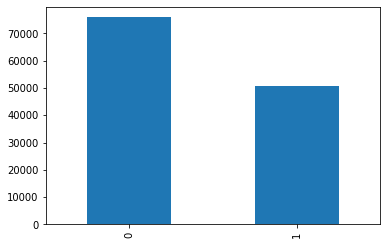

In [ ]:
updated_df['label'].value_counts().plot(kind='bar')

In [ ]:
y = updated_df['label']
X = updated_df['text_data']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [ ]:
max_words = 60000
max_len = 500
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
seq_model = Sequential()
seq_model.add(Embedding(max_words, 120, input_length=max_len))
seq_model.add(SpatialDropout1D(0.32))
seq_model.add(LSTM(100))
seq_model.add(Dense(1, activation='sigmoid'))
seq_model.summary()
seq_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 120)          7200000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               88400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 7,288,501
Trainable params: 7,288,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:

early_stopp = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=10
)

In [ ]:
trained_model = seq_model.fit(sequences_matrix,y_train,batch_size=1024,epochs=6,validation_split = 0.25, callbacks=[early_stopp])

Epoch 1/6
70/70 [==============================] - 749s 11s/step - loss: 0.3784 - accuracy: 0.8155 - val_loss: 0.1552 - val_accuracy: 0.9468
Epoch 2/6
70/70 [==============================] - 677s 10s/step - loss: 0.1031 - accuracy: 0.9664 - val_loss: 0.0992 - val_accuracy: 0.9684
Epoch 3/6
70/70 [==============================] - 678s 10s/step - loss: 0.0630 - accuracy: 0.9804 - val_loss: 0.0940 - val_accuracy: 0.9702
Epoch 4/6
70/70 [==============================] - 675s 10s/step - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0966 - val_accuracy: 0.9706
Epoch 5/6
70/70 [==============================] - 701s 10s/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.1026 - val_accuracy: 0.9693
Epoch 6/6
70/70 [==============================] - 671s 10s/step - loss: 0.0758 - accuracy: 0.9776 - val_loss: 0.1119 - val_accuracy: 0.9689


In [ ]:
test = tokenizer.texts_to_sequences(X_test)
testMat = sequence.pad_sequences(test,maxlen=max_len)

In [ ]:
accr = seq_model.evaluate(testMat,y_test)

991/991 [==============================] - 106s 107ms/step - loss: 0.1171 - accuracy: 0.9689


In [ ]:
lstm = seq_model.predict(testMat)

In [ ]:
trained_model.history

{'accuracy': [0.8154797554016113,
  0.9664062261581421,
  0.980404794216156,
  0.9856507778167725,
  0.9891854524612427,
  0.9776275157928467],
 'loss': [0.37837323546409607,
  0.10312525928020477,
  0.06301813572645187,
  0.04636092483997345,
  0.036363083869218826,
  0.07580184191465378],
 'val_accuracy': [0.9467704892158508,
  0.968398928642273,
  0.9701662063598633,
  0.9705870151519775,
  0.9692825675010681,
  0.9689459204673767],
 'val_loss': [0.155177041888237,
  0.09919103235006332,
  0.09400073438882828,
  0.09658827632665634,
  0.10256371647119522,
  0.11193156987428665]}

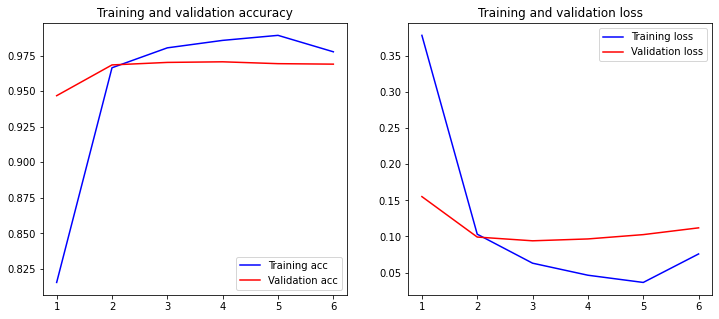

In [ ]:
acc = trained_model.history['accuracy']
val_acc = trained_model.history['val_accuracy']
loss = trained_model.history['loss']
val_loss = trained_model.history['val_loss']
x = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, acc, 'b', label='Training acc')
plt.plot(x, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, loss, 'b', label='Training loss')
plt.plot(x, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()


In [ ]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(sequences_matrix, y_train)
score = classifier.score(testMat, y_test)
print('Accuracy for data: {:.4f}'.format(score))

Accuracy for data: 0.6012


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:

with open('/content/drive/MyDrive/IR_PROJECT/Models/tokenizerEnglish.pickle', 'wb') as handle:
    pickle.dump(tokenizer,handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
seq_model.save("/content/drive/MyDrive/IR_PROJECT/Models/EnglishModel.h5")

In [ ]:
load_model=keras.models.load_model("/content/drive/MyDrive/IR_PROJECT/Models/EnglishModel.h5")
with open('/content/drive/MyDrive/IR_PROJECT/Models/tokenizerEnglish.pickle', 'rb') as handle:
    load_tokenizer = pickle.load(handle)

In [ ]:
y_test 


120344    0
53136     0
6697      0
33199     0
7751      0
         ..
36387     0
34174     1
57318     0
92678     0
42247     0
Name: label, Length: 31687, dtype: int64

In [ ]:
y_class_pred = load_model.predict(testMat)
y_class_pred

array([[2.18512869e-05],
       [3.82489197e-05],
       [4.94688749e-04],
       ...,
       [5.59300184e-04],
       [1.90854073e-03],
       [1.18685275e-05]], dtype=float32)

In [ ]:

stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))
query = input()
def preprocessing(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
query = [preprocessing(query)]
seq = load_tokenizer.texts_to_sequences(query)
padded = sequence.pad_sequences(seq, maxlen=500)
pred = load_model.predict(padded)
print("pred", pred)
if pred < 0.5:
    print("No Hate")
else:
    print("Hate And Abusive")